# Implementing and Evaluating a Random Forest Classifer

**1. Data Loading and Preprocessing**

In [23]:
# imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# a) load dataset
data = load_breast_cancer()
x = data.data
y = data.target

# b) 80:20 split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


**2. Decision Tree Implementation**

Decision Tree Metrics - 
Accuracy: 0.9211 
Precision: 0.9595 
Recall: 0.9221 
F1 Score: 0.9404 
ROC-AUC: 0.9205



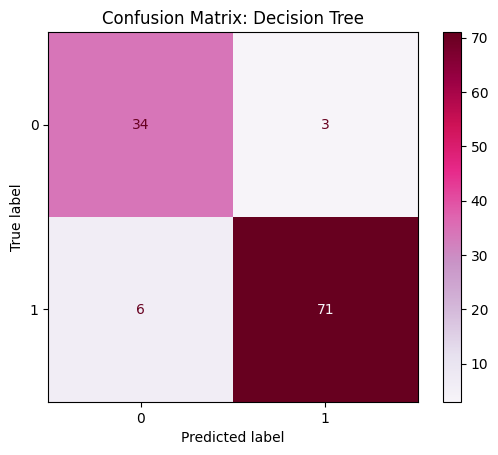

In [36]:
# a) imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# b) initialize descision tree classifier w/ params
dt_model = DecisionTreeClassifier(random_state=42)

# c) train model on training set
dt_model.fit(x_train, y_train)

# d) make predictions on training set
y_pred_dt = dt_model.predict(x_test)

# e) evaluate using metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(x_test)[:, 1])
print(f"Decision Tree Metrics - \nAccuracy: {accuracy_dt:.4f} \nPrecision: {precision_dt:.4f} \nRecall: {recall_dt:.4f} \nF1 Score: {f1_dt:.4f} \nROC-AUC: {roc_auc_dt:.4f}\n")

# f) generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
ax_dt= plt.subplot()
ax_dt.set_title('Confusion Matrix: Decision Tree')
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=dt_model.classes_)
disp_dt.plot(ax=ax_dt, cmap='PuRd')
plt.show()



**3. Random Forest Implementation**

Random Forest Metrics - 
Accuracy: 0.9649 
Precision: 0.9620 
Recall: 0.9870 
F1 Score: 0.9744 
ROC-AUC: 0.9839



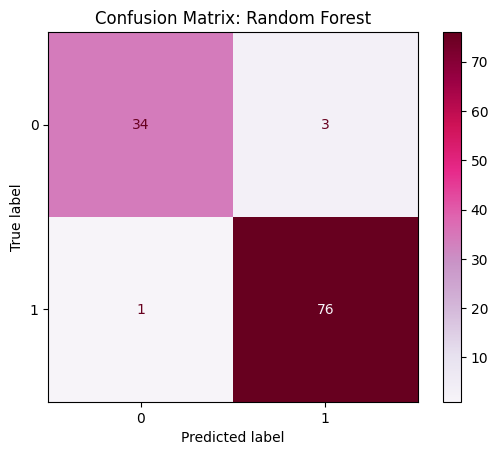

In [37]:
# a) imports
from sklearn.ensemble import RandomForestClassifier

# b) initialize random forest classifier w/ params
rf_model = RandomForestClassifier(max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)

# c) train model on training set
rf_model.fit(x_train, y_train)

# d) make predictions on training set
y_pred_rf = rf_model.predict(x_test)

# e) evaluate using metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
print(f"Random Forest Metrics - \nAccuracy: {accuracy_rf:.4f} \nPrecision: {precision_rf:.4f} \nRecall: {recall_rf:.4f} \nF1 Score: {f1_rf:.4f} \nROC-AUC: {roc_auc_rf:.4f}\n")

# f) generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ax_rf= plt.subplot()
ax_rf.set_title('Confusion Matrix: Random Forest')
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf_model.classes_)
disp_rf.plot(ax=ax_rf, cmap='PuRd')
plt.show()

**4. Hyperparameter Tuning using Grid Search**

C:\Users\imanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters based on accuracy: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


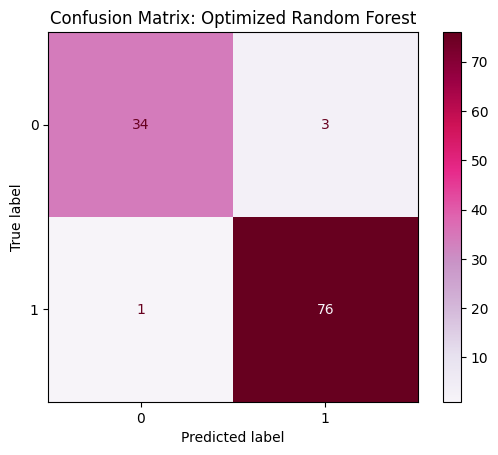

Optimized Random Forest Metrics - 
Accuracy: 0.9737 
Precision: 0.9744 
Recall: 0.9870 
F1 Score: 0.9806 
ROC-AUC: 0.9835



In [38]:
# a) hyperparam experiment for rf using gridsearchcv
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  
}

# b) cross validation to find best set of hyperparams
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, 
                           cv=3,  
                           scoring='accuracy',  
                           n_jobs=-1)  

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters based on accuracy: {best_params}")

# c) train model w/ params
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(x_train, y_train)
y_pred_best_rf = best_rf_model.predict(x_test)
roc_auc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(x_test)[:, 1])

# d) results
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

ax_best_rf= plt.subplot()
ax_best_rf.set_title('Confusion Matrix: Optimized Random Forest')
disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best_rf, display_labels=best_rf_model.classes_)
disp_rf.plot(ax=ax_best_rf, cmap='PuRd')
plt.show()

print(f"Optimized Random Forest Metrics - \nAccuracy: {accuracy_best_rf:.4f} \nPrecision: {precision_best_rf:.4f} \nRecall: {recall_best_rf:.4f} \nF1 Score: {f1_best_rf:.4f} \nROC-AUC: {roc_auc_best_rf:.4f}\n")



**5. Model Comparison**

    Metrics  Decision Tree  Random Forest  Best Random Forest (Tuned)
0  F1 Score       0.940397       0.974359                    0.980645
1   ROC-AUC       0.920498       0.983854                    0.983503


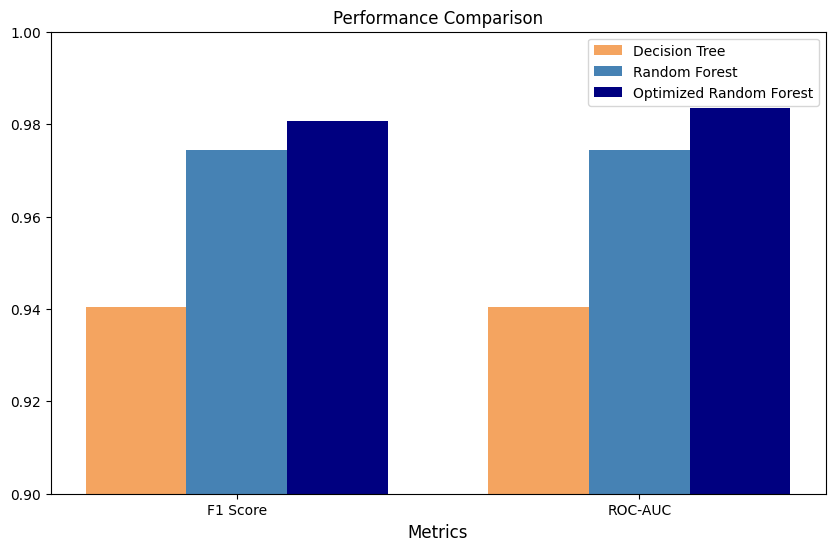

In [39]:
# a) performance of dt vs. rf w/ evaluation metrics
metrics = ['F1 Score', 'ROC-AUC']
decision_tree_scores = [f1_dt, roc_auc_dt]
random_forest_scores = [f1_rf, roc_auc_rf]
best_random_forest_scores = [f1_best_rf, roc_auc_best_rf]

data = {
    'Metrics': metrics,
    'Decision Tree': decision_tree_scores,
    'Random Forest': random_forest_scores,
    'Best Random Forest (Tuned)': best_random_forest_scores
}

df = pd.DataFrame(data)
print(df)

x = np.arange(len(metrics))  
width = 0.25 
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, f1_dt, width, label='Decision Tree', color='sandybrown')
ax.bar(x, f1_rf, width, label='Random Forest', color='steelblue')
ax.bar(x + width, best_random_forest_scores, width, label='Optimized Random Forest', color='navy')
ax.set_ylim(0.9, 1)

ax.set_xlabel('Metrics', fontsize =12)
ax.set_title('Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()


**_b) Which model performed better and why?_**

The `Optimized Random Forest` model outperformed the other two models across key metrics such as the F1 Score and ROC-AUC, visualized in the bar chart. 

The high F1 Score indicated a well-balanced performance, showing that the model can concurrently attain high percision and recall. The `Optimized Random Forest`'s F1 score shows that the model makes fewer incorrect classifications compared to other models.

A higher ROC-AUC indicates better performance and measures the ability to distinguish between classes. The metric observed for `Optimized Random Forest` is near perfection (1), and reflects its superior ability to seperate positive and negative cases, leading to more reliable predictions.

The consistent outperformance of the `Optimized Random Forest` model suggests the hyperparameter tuning successfuly maximized its capacity. However, sometimes the `Optimizes Random Forest` model can occasionaly be surpassed by another model, this is due to the aspect of randomness when training the data, along with differences in how each model handles the specific patterns in the data.

**_c) Analyze result to determine the impact of using an ensemble model over a single model._**

Ensemble models, being Random Forest in the context of this assignment, is an aggregation of multiple weaker learners (Decision Trees). Although they are more computationally expensive, they perform signficantly better than single models with their ability to generalize unknown patterns.

Ensemble models reduce overfitting by averaging predicitons across multiple models (reducing variance). They also minimize bias through combining models that have learned different aspects of the data.

Ensemble models also perform better on new data through combining the predictions of multiple models, resulting in them being able to find unknown patterns that a single model might miss.

In this case, the Random Forest model, an ensemble of decision trees provides more accurate predictions than any individual Decision Tree would by itself. The increased accuracy and stability in performace result from the ability to handle bias and variance trade-offs and produces and overall better fitting model.
    


# Cross Selling Recommendation with Apriori

**_Frequent Itemsets, Association Rules and Apiori Algorithm_**

In [13]:
# imports
from itertools import combinations
from collections import defaultdict

# parse file
with open('crossselling.txt', 'r') as f:
    transactions = [line.strip().split() for line in f.readlines()]

# helper functions
def get_singletons(transactions, min_support):
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[item] += 1

    frequentItems = {item: count for item, count in item_counts.items() if count >= min_support}
    return frequentItems

def get_combinations(transactions, itemsetSize, min_support):
    itemset_counts = defaultdict(int)
    for transaction in transactions:
        for itemset in combinations(transaction, itemsetSize):
            itemset_counts[itemset] += 1

    frequentItemsets = {itemset: count for itemset, count in itemset_counts.items() if count >= min_support}
    return frequentItemsets

# confidence for pair and triples
def pair_confidences(frequent_pairs, frequent_singletons):
    pairConfidences = {}
    for pair, support_count in frequent_pairs.items():
        conf_X_to_Y = support_count / frequent_singletons.get(pair[0], float('inf'))
        conf_Y_to_X = support_count / frequent_singletons.get(pair[1], float('inf'))
        pairConfidences[pair] = (support_count, conf_X_to_Y, conf_Y_to_X)
    
    sorted_pairs = sorted(pairConfidences.items(), key=lambda x: x[1][1], reverse=True)
    return sorted_pairs

def triple_confidences(frequent_triples, frequent_pairs):
    tripleConfidences = {}
    for triple, support_count in frequent_triples.items():
        support_XY = frequent_pairs.get((triple[0], triple[1]), 0)
        support_XZ = frequent_pairs.get((triple[0], triple[2]), 0)
        support_YZ = frequent_pairs.get((triple[1], triple[2]), 0)

        conf_XY_Z = support_count / support_XY if support_XY > 0 else 0
        conf_XZ_Y = support_count / support_XZ if support_XZ > 0 else 0
        conf_YZ_X = support_count / support_YZ if support_YZ > 0 else 0
        tripleConfidences[triple] = (support_count, conf_XY_Z, conf_XZ_Y, conf_YZ_X)
    
    sorted_triples = sorted(tripleConfidences.items(), key=lambda x: x[1][1], reverse=True)
    return sorted_triples

# primary function
def main(transactions, min_support):
    frequent_singletons = get_singletons(transactions, min_support)
    frequent_pairs = get_combinations(transactions, 2, min_support)
    frequent_triples = get_combinations(transactions, 3, min_support)

    print(f"\nMinimum Support: {min_support}")
    print(f"Number of frequent singletons: {len(frequent_singletons)}")
    print(f"Number of frequent pairs: {len(frequent_pairs)}")
    print(f"Number of frequent triples: {len(frequent_triples)}")

    sorted_pairs = pair_confidences(frequent_pairs, frequent_singletons)
    sorted_triples = triple_confidences(frequent_triples, frequent_pairs)

    print("\nTop 5 Rules from Frequent Pairs (sorted by confidence):")
    for i, ((X, Y), (support, conf_X_to_Y, conf_Y_to_X)) in enumerate(sorted_pairs[:5]):
        print(f"Rule {i + 1}: {X} -> {Y}, Support: {support}, Confidence: {conf_X_to_Y:.4f}")

    print("\nTop 5 Rules from Frequent Triples (sorted by confidence):")
    for i, ((X, Y, Z), (support, conf_XY_Z, conf_XZ_Y, conf_YZ_X)) in enumerate(sorted_triples[:5]):
        print(f"Rule {i + 1}: ({X}, {Y}) -> {Z}, Support: {support}, Confidence: {conf_XY_Z:.4f}")

main(transactions, 100)
main(transactions, 250)


Minimum Support: 100
Number of frequent singletons: 647
Number of frequent pairs: 760
Number of frequent triples: 67

Top 5 Rules from Frequent Pairs (sorted by confidence):
Rule 1: DAI43868 -> SNA82528, Support: 282, Confidence: 0.9527
Rule 2: GRO89004 -> ELE25077, Support: 214, Confidence: 0.6948
Rule 3: ELE92920 -> DAI62779, Support: 804, Confidence: 0.6717
Rule 4: SNA18336 -> DAI62779, Support: 462, Confidence: 0.6516
Rule 5: SNA18336 -> ELE92920, Support: 451, Confidence: 0.6361

Top 5 Rules from Frequent Triples (sorted by confidence):
Rule 1: (GRO81087, ELE92920) -> DAI62779, Support: 111, Confidence: 0.9098
Rule 2: (SNA18336, ELE92920) -> DAI62779, Support: 406, Confidence: 0.9002
Rule 3: (GRO73461, FRO47962) -> DAI75645, Support: 103, Confidence: 0.7574
Rule 4: (DAI62779, SNA53220) -> SNA93860, Support: 121, Confidence: 0.6402
Rule 5: (DAI62779, ELE99737) -> DAI85309, Support: 104, Confidence: 0.5810

Minimum Support: 250
Number of frequent singletons: 287
Number of frequent 

**_Analysis and Insights_**

With a lower minimum support of 100, the count of singletons, pairs, and triples is high, at `647`, `760`, and `67` respectively. The low threshold allows for more items and combinations to be frequent and allows for more items and combinations to classify as frequent and thus gives a broader view of relationships within the itemset. Increasing the minimum support to 250 resuces these numbers to `287` singletons, `91` pairs, and only `3` triples. This shows us that most of the frequently occuring itmes and combinations remain, since less combinations are filtered out.

We can see that the confidence of the top five rules is constant across both minimum support values. For example, the top rule for frequent pairs, `DAI43868 -> SNA82528`, has a high confidence of `0.9527` in both cases, which indicates a strong and consistent relationship. For Triples on the other hand, if we lower the support threshold to 100, it allows for additional high-confidence rules to show, such as `(GRO81087, ELE92920) -> DAI62779` with a confidence of `0.9098`, which does not appear when threshold is 250. This shows that as the support value increases, less rules are generated and the rules that stay are the strongest patterns present in the data. Overall, the high-confidence values that remain unaffected supports the strength of the associations.

In summary, lower minimum support threshold shows more relationshios in the data, and these can be used for further exploratory analysis, allowing for a broader view of associations present. The higher support threshold (250) isolates the most significant patterns and keeps the core associations. This is important since it can be useful to identify the core patterns more easily. Ultimately, the choice of whether to use a larger support value depends on the insights that are needed, since either value can highlight different aspects of the data.